<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/Deep_Learning_with_Pytorch_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torchvision transformations를 이용하여 데이터를 파이토치 텐서로 변환하고, 정규화 함.

다음코드는 데이터를 다운로드 한 뒤, DataLoader로 전달하여 정규화하는 작업임.

In [4]:
transformation = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.14,),(0.32,))])

training_dataset = datasets.MNIST('dataset/', train=True,transform = transformation, download=True)
test_dataset = datasets.MNIST('dataset/', train=False, transform=transformation, download = True)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size = 32, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle= True)


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw




Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


위의 코드는 학습과 테스트 데이터셋을 위한 DataLoader 변수를 제공한다.

우리가 다르고 있는 데이터를 이해하기 위해 몇 가지 이미지를 시각화해 보자. 다음 코드는 MNIST이미지를 시각화하도록 해준다.

In [5]:
def plot_img(image):
  image = image.numpy()[0]
  mean = 0.1307
  std = 0.3081
  image = ((mean*image) + std)
  plt.imshow(image, cmap= 'gray')

데이터셋을 시각화하기위해 plot_img 메소드를 이용할 수 있다.

아래의 코드를 통해 DataLoader에 의한 변수로부터 데이터의 배치를 가져와서 이미지를 그릴 수 있다.

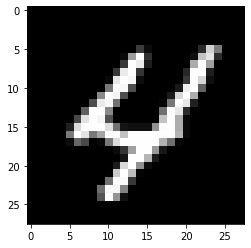

In [6]:
sample_data = next(iter(training_loader))

plot_img(sample_data[0][1])

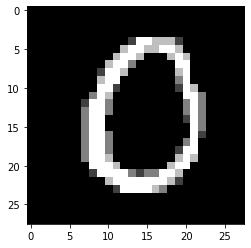

In [7]:
plot_img(sample_data[0][2])

# CNN 모델 처음부터 구축하기

In [8]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size= 5)
    self.conv2  == nn.Conv2d(10, 10, kernel_size =5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

    
  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))

    x= self.fc2(x)
    return F.log_soft(x, dim=1)

In [11]:
conv = nn.Conv1d(1,1,3, bias= True)
sample = torch.randn(1,1,7)
conv(Variable(sample))

#Check the weights of our convolution filter by
conv.weight

Parameter containing:
tensor([[[-0.0771,  0.0978,  0.3912]]], requires_grad=True)

In [1]:
# /// 텍스트

In [2]:
toy_story_review = "Just perfect. Script, character, animation....this manages to break free of the yoke of 'children's movie' to simply be one of the best movies of the 90's, full-stop."
print(list(toy_story_review))

['J', 'u', 's', 't', ' ', 'p', 'e', 'r', 'f', 'e', 'c', 't', '.', ' ', 'S', 'c', 'r', 'i', 'p', 't', ',', ' ', 'c', 'h', 'a', 'r', 'a', 'c', 't', 'e', 'r', ',', ' ', 'a', 'n', 'i', 'm', 'a', 't', 'i', 'o', 'n', '.', '.', '.', '.', 't', 'h', 'i', 's', ' ', 'm', 'a', 'n', 'a', 'g', 'e', 's', ' ', 't', 'o', ' ', 'b', 'r', 'e', 'a', 'k', ' ', 'f', 'r', 'e', 'e', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'y', 'o', 'k', 'e', ' ', 'o', 'f', ' ', "'", 'c', 'h', 'i', 'l', 'd', 'r', 'e', 'n', "'", 's', ' ', 'm', 'o', 'v', 'i', 'e', "'", ' ', 't', 'o', ' ', 's', 'i', 'm', 'p', 'l', 'y', ' ', 'b', 'e', ' ', 'o', 'n', 'e', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'b', 'e', 's', 't', ' ', 'm', 'o', 'v', 'i', 'e', 's', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', '9', '0', "'", 's', ',', ' ', 'f', 'u', 'l', 'l', '-', 's', 't', 'o', 'p', '.']


이 결과는 간단한 파이썬 함수가 어떻게 텍스트를 토큰으로 변환했는지 보여준다.

In [3]:
print(list(toy_story_review.split()))

['Just', 'perfect.', 'Script,', 'character,', 'animation....this', 'manages', 'to', 'break', 'free', 'of', 'the', 'yoke', 'of', "'children's", "movie'", 'to', 'simply', 'be', 'one', 'of', 'the', 'best', 'movies', 'of', 'the', "90's,", 'full-stop.']


공백 기준으로 split사용 하여 단어로 변환.

# N-gram 표현

N-grams은 주어진 텍스트로부터 추출된 단어의 그룹이다.
n은 함께 사용될 수 있는 단어의 숫자를 나타낸다.
bigram(n=2)이 어떻게 보이는지 예를 살펴보자.
nltk패키지를 사용하여 toy_story_review에 대한 bigram생성.

In [4]:
from nltk import ngrams
print(list(ngrams(toy_story_review.split(), 2)))

[('Just', 'perfect.'), ('perfect.', 'Script,'), ('Script,', 'character,'), ('character,', 'animation....this'), ('animation....this', 'manages'), ('manages', 'to'), ('to', 'break'), ('break', 'free'), ('free', 'of'), ('of', 'the'), ('the', 'yoke'), ('yoke', 'of'), ('of', "'children's"), ("'children's", "movie'"), ("movie'", 'to'), ('to', 'simply'), ('simply', 'be'), ('be', 'one'), ('one', 'of'), ('of', 'the'), ('the', 'best'), ('best', 'movies'), ('movies', 'of'), ('of', 'the'), ('the', "90's,"), ("90's,", 'full-stop.')]


ngrams함수는 첫 번째 인수로는 단어들의 순서를 받고 두 번째 인수로 그룹되어질 단어들의 숫자를 받는다.

# 특징
많은 지도학습 기계 학습 모델들, 예를 들어 Naive Bayes와 같은 것은 특징 공간(feature space)을 개선하기위해 n-gram을 사용한다. 또한 N-gram은 **철자 교정 및 텍스트 요약 작업**에도 사용된다.

# 한계 및 과제
n-gram 표현의 한가지 과제는 텍스트의 순차적인 특성을 잃어버린다는 것이다. n-gram은 얕은 기계 학습 모델에 자주 사용된다. 이 기술은 RNN 및 Conv1D과 같은 아키텍쳐들이 이러한 표현을 자동으로 학습하기 때문에 심층 학습에서는 잘 사용되지 않는다.

In [5]:
class Dictionary(object):
  def __init__(self):
    self.word2index = {}
    self.index2word =[]
    self.length = 0
  def add_word(self, word):
    if word not in self.index2word:
      self.index2word.append(word)
      self.word2index[word] = self.length +1
      self.length +=1
    return self.word2index[word]
  def __len__(self):
    return len(self.index2word)
  def onehot_encoded(self, word):
    vec = np.zeros(self.length)
    vec[self.word2index[word]] = 1
    return vec

init함수 : word2index 인덱스와 함께 모든 **고유한 단어**를 저장할 딕셔너리 생성. index2word 리스트는 모든 고유한 단어를 저장하고 length변수는 문서에서 고유한 전체 단어의 개수를 포함한다.

add_word 함수는 단어를 취해서 word2index와 index2word에 추가하고 제공된 단어가 고유하면, 어휘의 길이를 증가한다.

onehot_encoded함수는 단어를 취해서 단어의 인덱스를 제외한 나머지가 0인 값을 가지는 길이 N의 벡터를 반환한다.
전달된 단어의 인덱스가 2라면, 인덱스 2의 벡터 값은 1이 되고, 나머지 값은 모두 0이 돤다.

In [6]:
dic = Dictionary()

for tok in toy_story_review.split() : dic.add_word(tok)

print(dic.word2index)

{'Just': 1, 'perfect.': 2, 'Script,': 3, 'character,': 4, 'animation....this': 5, 'manages': 6, 'to': 7, 'break': 8, 'free': 9, 'of': 10, 'the': 11, 'yoke': 12, "'children's": 13, "movie'": 14, 'simply': 15, 'be': 16, 'one': 17, 'best': 18, 'movies': 19, "90's,": 20, 'full-stop.': 21}


# one-hot encoded의 limit
1. 데이터가 너무 희소하다는 것 과 어휘에서 고유한 단어들이 증가함에 따라 벡터의 길이도 빠르게 커진다는 것.
2. one-hot은 단어들간의 내부적인 연관성을 표현하지 못한다는 것.
  이러한 이유로 one-hot은 심층 학습에서 거의 사용하지 않는다.
